In [2]:
pip install opencv-contrib-python

In [3]:
pip install pytesseract

In [16]:
pip install Tesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=90e8cfd83279f4dfe240eac1c147e40a36cbe4a5c36bd9b21e2d5216cdc56339
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built Tesseract


In [4]:
pip install imutils

In [21]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 723.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [22]:
import cv2
import imutils
import pytesseract
from google.colab import files
from google.colab.patches import cv2_imshow
import easyocr

In [7]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

Saving PNG.CAK.jpg to PNG.CAK (1).jpg


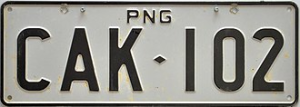

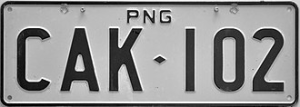

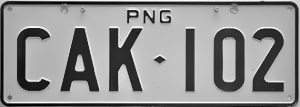

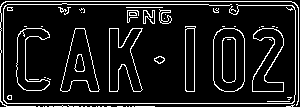

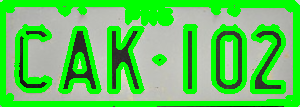

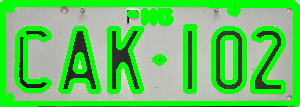

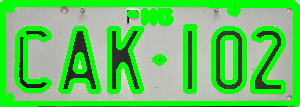

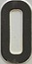

CAK |02


In [33]:
def values(image_path):
    image = cv2.imread(image_path)
    image = imutils.resize(image, width=300 )
    cv2_imshow( image)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_image)

    gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17)
    cv2_imshow(gray_image)

    edged = cv2.Canny(gray_image, 30, 200)
    cv2_imshow(edged)
    cv2.waitKey(0)
    cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    image1=image.copy()
    cv2.drawContours(image1,cnts,-1,(0,255,0),3)
    cv2_imshow(image1)

    cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
    screenCnt = None
    image2 = image.copy()
    cv2.drawContours(image2,cnts,-1,(0,255,0),3)
    cv2_imshow(image2)

    i=7
    for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4:
                screenCnt = approx

        x,y,w,h = cv2.boundingRect(c)
        new_img=image[y:y+h,x:x+w]
        cv2.imwrite('./'+str(i)+'.png',new_img)
        i+=1
        cv2.drawContours(image, cnts, -1, (0, 255, 0), 3)
        cv2_imshow(image)


        Cropped_loc = './7.png'
        cv2_imshow(cv2.imread(Cropped_loc))
        custom_config = r'-l eng --oem 3 --psm 6'
        # Initialize the EasyOCR reader
        reader = easyocr.Reader(['en'])
        # Detect the license plate
        result = reader.readtext(image)
        # Print the license plate number
        print(result[0][1])



        break

# Upload the image file to Google Colab
uploaded = files.upload()
image_path = next(iter(uploaded))

values(image_path)

